# DNN (1주차)

SEOYEON CHOI  
2022-09-07

기계학습 특강 (1주차) 9월7일 \[pytorch\]

> 우리의 1차 목표: 이미지 -\> 개/고양이 판단하는 모형을 채용하고, 그
> 모형에 데이터를 넣어서 학습하고, 그 모형의 결과를 판단하고 싶다. (즉
> 클래시파이어를 만든다는 소리)

> 우리의 2차 목표: 그 모형에 “새로운” 자료를 전달하여 이미지를 분류할
> 것이다. (즉 클래시파이어를 쓴다는 소리)

### import

In [1]:
from fastai.vision.all import *

In [2]:
#!nvidia-smi

In [3]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz'

In [4]:
path = untar_data(URLs.PETS)/'images'

In [5]:
path

Path('/home/csy/.fastai/data/oxford-iiit-pet/images')

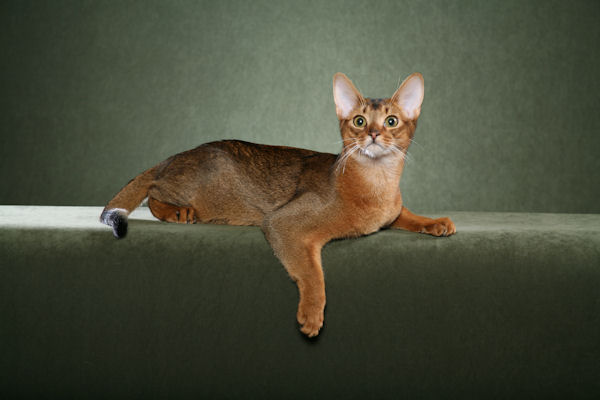

In [6]:
PILImage.create('/home/csy/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg')

In [7]:
_lst = ['/home/csy/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg','/home/csy/.fastai/data/oxford-iiit-pet/images/Abyssinian_10.jpg']
_lst

['/home/csy/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg',
 '/home/csy/.fastai/data/oxford-iiit-pet/images/Abyssinian_10.jpg']

In [8]:
_lst[0]

'/home/csy/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'

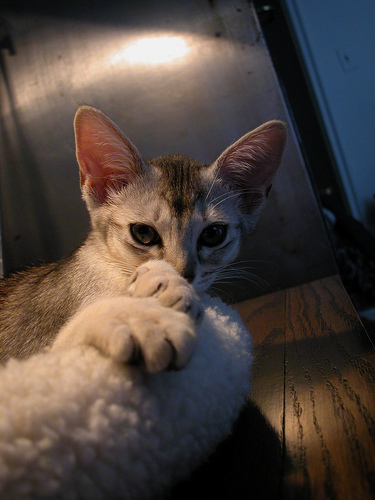

In [9]:
PILImage.create(_lst[1])

In [10]:
filenames = get_image_files(path)
filenames

(#7390) [Path('/home/csy/.fastai/data/oxford-iiit-pet/images/Bombay_13.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/beagle_193.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/Ragdoll_8.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/boxer_106.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/keeshond_56.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_162.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/saint_bernard_136.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_76.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/pug_173.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_117.jpg')...]

In [11]:
filenames[0]

Path('/home/csy/.fastai/data/oxford-iiit-pet/images/Bombay_13.jpg')

/home/csy/.fastai/data/oxford-iiit-pet/images/Bombay_13.jpg

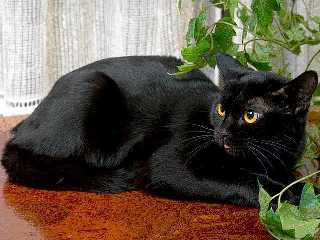

In [12]:
print(filenames[0])
PILImage.create(filenames[0])

/home/csy/.fastai/data/oxford-iiit-pet/images/beagle_193.jpg

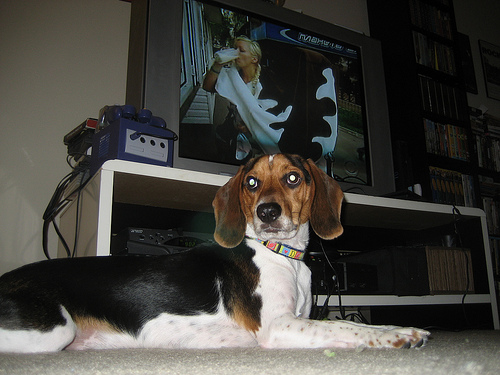

In [13]:
print(filenames[1])
PILImage.create(filenames[1])

/home/csy/.fastai/data/oxford-iiit-pet/images/Ragdoll_8.jpg

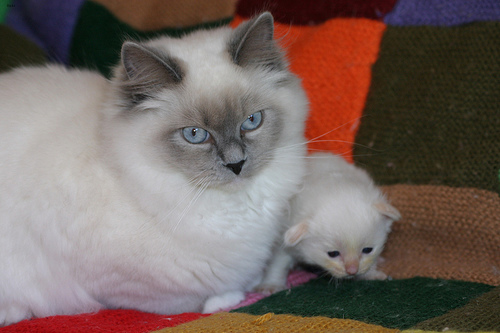

In [14]:
print(filenames[2])
PILImage.create(filenames[2])

/home/csy/.fastai/data/oxford-iiit-pet/images/boxer_106.jpg

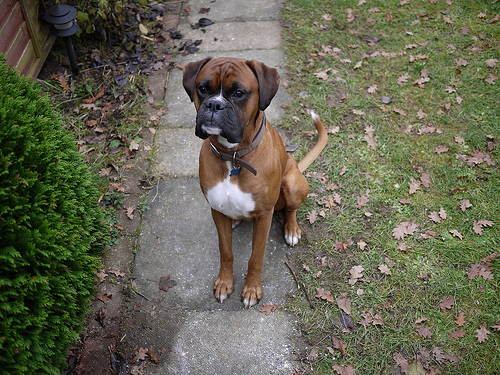

In [15]:
print(filenames[3])
PILImage.create(filenames[3])

/home/csy/.fastai/data/oxford-iiit-pet/images/keeshond_56.jpg

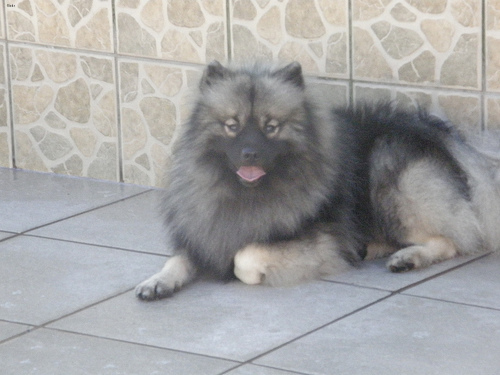

In [16]:
print(filenames[4])
PILImage.create(filenames[4])

/home/csy/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_162.jpg

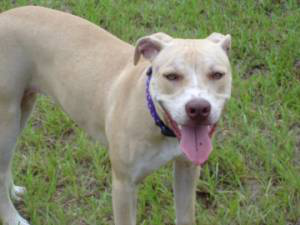

In [17]:
print(filenames[5])
PILImage.create(filenames[5])

/home/csy/.fastai/data/oxford-iiit-pet/images/saint_bernard_136.jpg

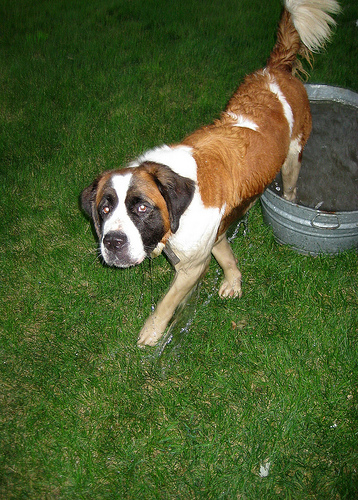

In [18]:
print(filenames[6])
PILImage.create(filenames[6])

/home/csy/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_76.jpg

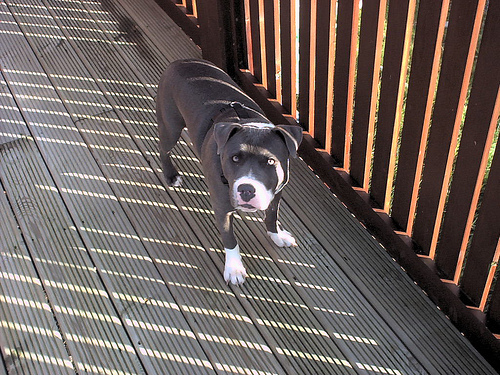

In [19]:
print(filenames[7])
PILImage.create(filenames[7])

/home/csy/.fastai/data/oxford-iiit-pet/images/pug_173.jpg

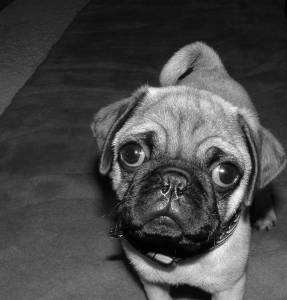

In [20]:
print(filenames[8])
PILImage.create(filenames[8])

/home/csy/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_117.jpg

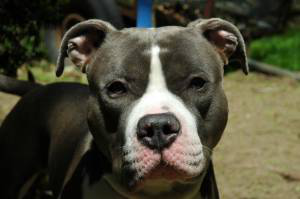

In [21]:
print(filenames[9])
PILImage.create(filenames[9])

/home/csy/.fastai/data/oxford-iiit-pet/images/Maine_Coon_266.jpg

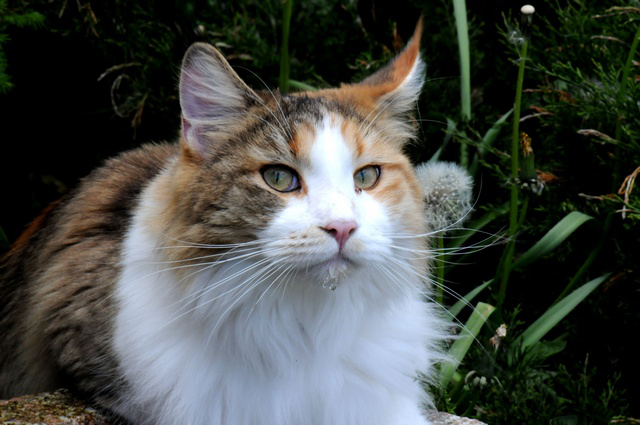

In [22]:
print(filenames[20])
PILImage.create(filenames[20])

vector로 되어 있는 tensor

------------------------------------------------------------------------

In [23]:
'A'.isupper()

True

------------------------------------------------------------------------

In [24]:
def f(fname):
    if fname[0].isupper():
        return 'cat'
    else:
        return 'dog'

In [25]:
f('dddd')

'dog'

In [26]:
filenames[0]

Path('/home/csy/.fastai/data/oxford-iiit-pet/images/Bombay_13.jpg')

In [27]:
ImageDataLoaders.from_name_func??

Signature: 
ImageDataLoaders . from_name_func ( 
 path , 
 fnames , 
 label_func , 
 valid_pct = 0.2 , 
 seed = None , 
 item_tfms = None , 
 batch_tfms = None , 
 bs = 64 , 
 val_bs = None , 
 shuffle = True , 
 device = None , 
 ) 
 Source: 
 @ classmethod
 def from_name_func ( cls , path , fnames , label_func , ** kwargs ) : 
 "Create from the name attrs of `fnames` in `path`s with `label_func`" 
 if sys . platform == 'win32' and isinstance ( label_func , types . LambdaType ) and label_func . __name__ == '<lambda>' : 
 # https://medium.com/@jwnx/multiprocessing-serialization-in-python-with-pickle-9844f6fa1812 
 raise ValueError ( "label_func couldn't be lambda function on Windows" ) 
 f = using_attr ( label_func , 'name' ) 
 return cls . from_path_func ( path , fnames , f , ** kwargs ) 
 File: ~/anaconda3/envs/csy/lib/python3.8/site-packages/fastai/vision/data.py
 Type: method

dls는 object - 동사 - 명사(method)

size가 다르기 때문에 dls 적용이 되지 않아 resize로 조정을 해주었다.

In [28]:
path

Path('/home/csy/.fastai/data/oxford-iiit-pet/images')

In [29]:
dls = ImageDataLoaders.from_name_func(path,filenames,f,item_tfms=Resize(224))
#dls

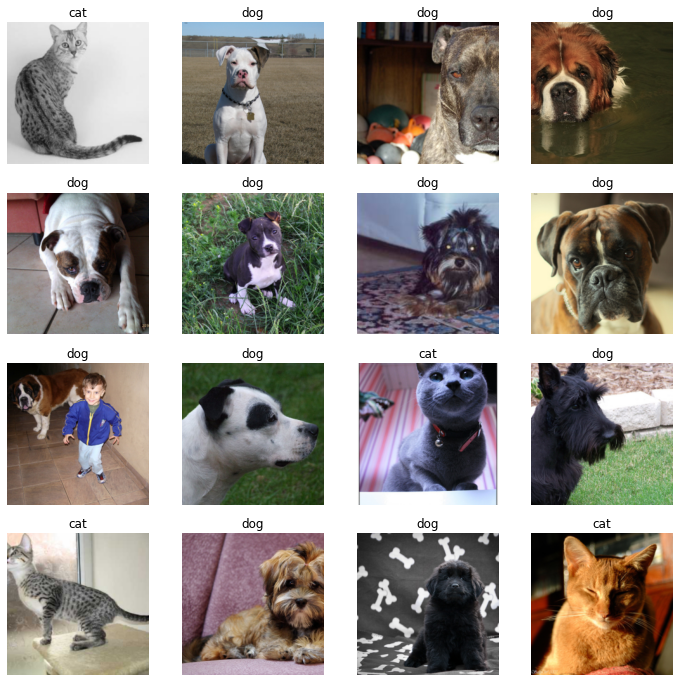

In [30]:
dls.show_batch(max_n=16)

### 학습

#### object

-   noun

1.  data
2.  채용할 모델의 이름
3.  평가기준 metric

-   verb

1.  학습
2.  판단

In [31]:
ysj = cnn_learner(dls,resnet34,metrics=error_rate)

In [32]:
ysj.fine_tune(1)

### 기존 데이터를 잘 맞추는지 확인

In [33]:
filenames[0]

Path('/home/csy/.fastai/data/oxford-iiit-pet/images/Bombay_13.jpg')

In [34]:
ysj.predict(PILImage.create(filenames[0]))

('cat', TensorBase(0), TensorBase([1.0000e+00, 3.5260e-07]))

In [35]:
ysj.predict(filenames[0])

('cat', TensorBase(0), TensorBase([1.0000e+00, 3.5260e-07]))

In [36]:
filenames[1]

Path('/home/csy/.fastai/data/oxford-iiit-pet/images/beagle_193.jpg')

In [37]:
ysj.predict(filenames[1])

('dog', TensorBase(1), TensorBase([2.0373e-04, 9.9980e-01]))

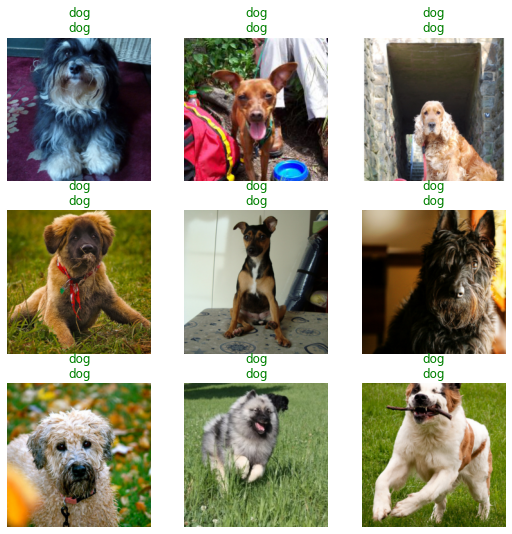

In [38]:
ysj.show_results()

### 오답분석

In [39]:
checker = Interpretation.from_learner(ysj)

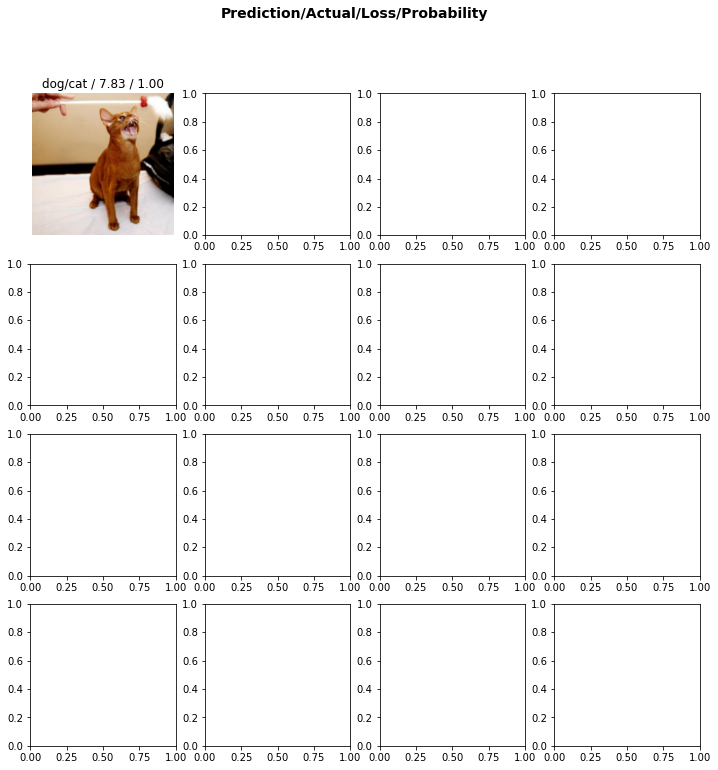

In [40]:
checker.plot_top_losses(k=16)

### 좋은 모델인가?

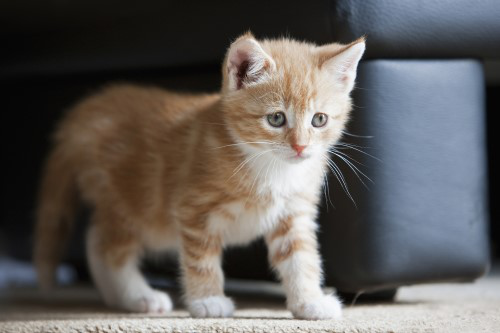

In [41]:
PILImage.create('2022-01-13-cat.jpg')

In [42]:
ysj.predict(PILImage.create('2022-01-13-cat.jpg'))

('cat', TensorBase(0), TensorBase([1.0000e+00, 3.8330e-16]))

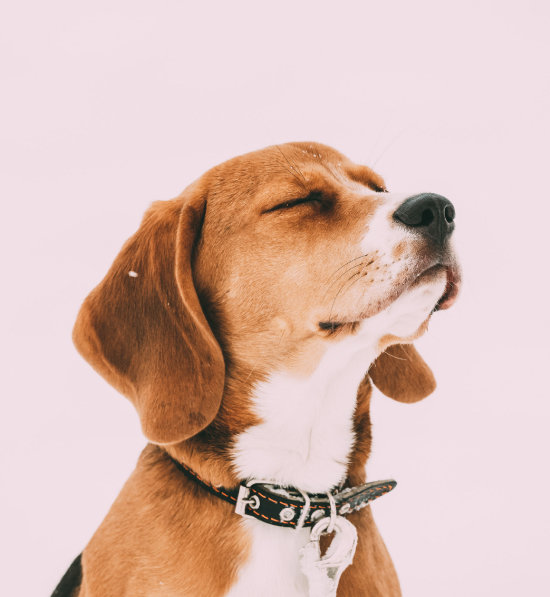

In [43]:
PILImage.create(requests.get('https://dimg.donga.com/ugc/CDB/SHINDONGA/Article/5e/0d/9f/01/5e0d9f011a9ad2738de6.jpg').content)

In [44]:
img=PILImage.create(requests.get('https://dimg.donga.com/ugc/CDB/SHINDONGA/Article/5e/0d/9f/01/5e0d9f011a9ad2738de6.jpg').content)
ysj.predict(img)

('dog', TensorBase(1), TensorBase([2.1535e-06, 1.0000e+00]))

In [45]:
img=PILImage.create(requests.get('https://github.com/guebin/STML2022/blob/master/_notebooks/2022-09-06-cat1.png?raw=true').content)
ysj.predict(img)

('cat', TensorBase(0), TensorBase([9.9982e-01, 1.8307e-04]))

In [46]:
img=PILImage.create(requests.get('https://github.com/guebin/STML2022/blob/master/_notebooks/2022-09-06-cat2.jpeg?raw=true').content)
ysj.predict(img)

('cat', TensorBase(0), TensorBase([1.0000e+00, 2.0889e-07]))

In [47]:
img=PILImage.create(requests.get('https://github.com/guebin/STML2022/blob/master/_notebooks/2022-09-06-hani01.jpeg?raw=true').content)
ysj.predict(img)

('dog', TensorBase(1), TensorBase([9.5189e-06, 9.9999e-01]))

In [48]:
img=PILImage.create(requests.get('https://github.com/guebin/STML2022/blob/master/_notebooks/2022-09-06-hani02.jpeg?raw=true').content)
ysj.predict(img)

('dog', TensorBase(1), TensorBase([2.0720e-05, 9.9998e-01]))

In [49]:
img=PILImage.create(requests.get('https://github.com/guebin/STML2022/blob/master/_notebooks/2022-09-06-hani03.jpg?raw=true').content)
ysj.predict(img)

('dog', TensorBase(1), TensorBase([0.0513, 0.9487]))

------------------------------------------------------------------------

### homework

-   임의의 사진으로 잘 맞추는지 확인

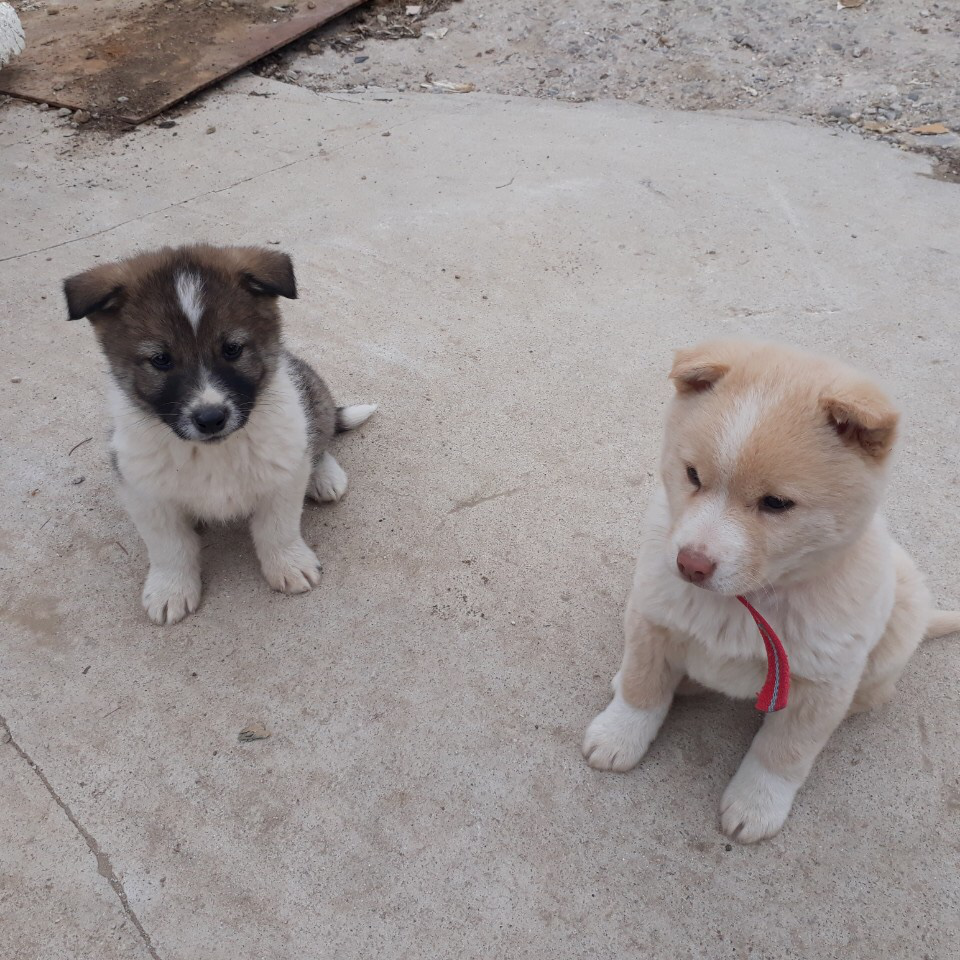

In [50]:
PILImage.create('2022-09-07-dogs.jpeg')

In [51]:
ysj.predict(PILImage.create('2022-09-07-dogs.jpeg'))

('dog', TensorBase(1), TensorBase([2.7947e-04, 9.9972e-01]))

In [52]:
img2=PILImage.create('2022-09-07-dogs.jpeg')
ysj.predict(img2)

('dog', TensorBase(1), TensorBase([2.7947e-04, 9.9972e-01]))

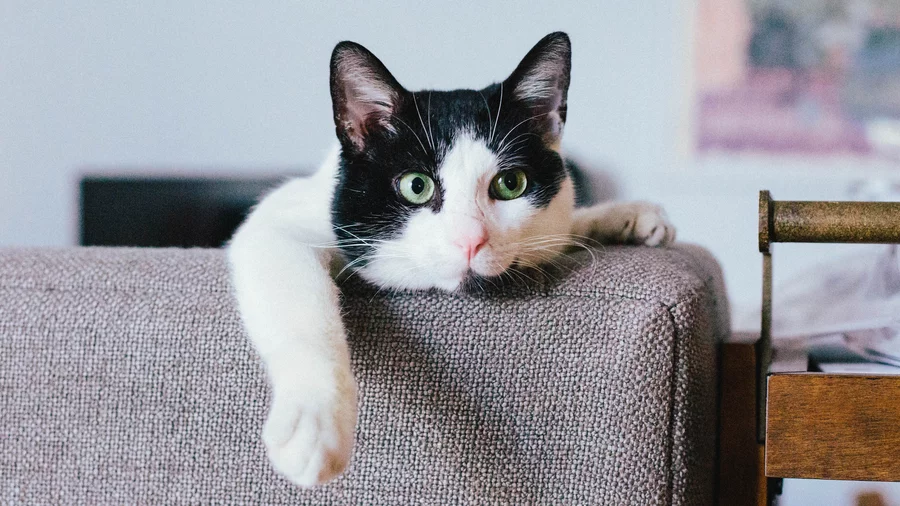

In [53]:
PILImage.create(requests.get('https://media.npr.org/assets/img/2021/08/11/gettyimages-1279899488_wide-f3860ceb0ef19643c335cb34df3fa1de166e2761-s900-c85.webp').content)

In [54]:
img=PILImage.create(requests.get('https://media.npr.org/assets/img/2021/08/11/gettyimages-1279899488_wide-f3860ceb0ef19643c335cb34df3fa1de166e2761-s900-c85.webp').content)
ysj.predict(img)

('cat', TensorBase(0), TensorBase([1.0000e+00, 2.5169e-10]))